Automatically created module for IPython interactive environment


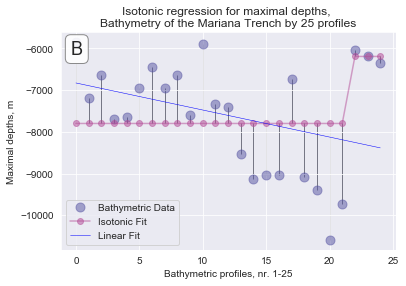

In [30]:
print(__doc__)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
import os
sns.set_style('darkgrid')

os.chdir('/Users/pauline/Documents/Python')
df = pd.read_csv("Tab-Morph.csv")

n = 25
x = np.arange(n)
#x = df.slope_angle
rs = check_random_state(0)
y = df.Min + 3. * np.log1p(x)

# #############################################################################
# Fit IsotonicRegression and LinearRegression models

ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

# #############################################################################
# Plot result

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, '.', c = '#5654a2', markersize=18, alpha=.5)
plt.plot(x, y_, '.-', c = '#b44c97', markersize=12, alpha=.5)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-', linewidth=.5)
plt.gca().add_collection(lc)
plt.legend(('Bathymetric Data', 'Isotonic Fit', 'Linear Fit'), loc='lower left')
plt.title('Isotonic regression for maximal depths, \nBathymetry of the Mariana Trench by 25 profiles')
plt.xlabel('Bathymetric profiles, nr. 1-25', fontsize=10, fontfamily='sans-serif')
plt.ylabel('Maximal depths, m', fontsize=10, fontfamily='sans-serif')

plt.annotate('B', xy=(0.03, .90), xycoords="axes fraction", fontsize=18,
           bbox=dict(boxstyle='round, pad=0.3', fc='w', edgecolor='grey', linewidth=1, alpha=0.9))
plt.show()